In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/novartis-data-science-hiring-challenge/predict-if-the-server-will-be-hacked-a1889487/6a62a5b4967411ea.zip

--2020-06-19 06:14:41--  https://he-s3.s3.amazonaws.com/media/hackathon/novartis-data-science-hiring-challenge/predict-if-the-server-will-be-hacked-a1889487/6a62a5b4967411ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.232
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555520 (542K) [application/zip]
Saving to: ‘6a62a5b4967411ea.zip’

6a62a5b4967411ea.zi 100%[===================>] 542.50K   700KB/s    in 0.8s    

2020-06-19 06:14:43 (700 KB/s) - ‘6a62a5b4967411ea.zip’ saved [555520/555520]



In [ ]:
!unzip 6a62a5b4967411ea.zip

Archive:  6a62a5b4967411ea.zip
   creating: Dataset/
  inflating: Dataset/Train.csv       
  inflating: Dataset/sample_submission.csv  
  inflating: Dataset/Test.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')

In [ ]:
train.head(5)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,year,day,weekofyear,month,dayofweek,weekend
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0,2004,4,27,7,6,1
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0,2017,18,29,7,1,0
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0,2017,15,11,3,2,0
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0,2009,13,7,2,4,0
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0,2005,13,15,4,2,0


In [ ]:
test.tail(5)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,year,day,weekofyear,month,dayofweek,weekend
39754,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43,1997,28,48,11,4,0
39755,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34,2012,9,23,6,5,1
39756,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34,2006,22,16,4,5,1
39757,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34,2009,3,14,4,4,0
39758,0,4,4,6,5,4,2,5,6,1,249,1.0,72,29,34,1996,24,17,4,2,0


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(INCIDENT_ID           0
 DATE                  0
 X_1                   0
 X_2                   0
 X_3                   0
 X_4                   0
 X_5                   0
 X_6                   0
 X_7                   0
 X_8                   0
 X_9                   0
 X_10                  0
 X_11                  0
 X_12                182
 X_13                  0
 X_14                  0
 X_15                  0
 MULTIPLE_OFFENSE      0
 dtype: int64, INCIDENT_ID      0
 DATE             0
 X_1              0
 X_2              0
 X_3              0
 X_4              0
 X_5              0
 X_6              0
 X_7              0
 X_8              0
 X_9              0
 X_10             0
 X_11             0
 X_12           127
 X_13             0
 X_14             0
 X_15             0
 dtype: int64, (23856, 18), (15903, 17), INCIDENT_ID          object
 DATE                 object
 X_1                   int64
 X_2                   int64
 X_3                   int64
 X_4       

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
df['X_12']=df['X_12'].fillna(df['X_12'].mean())

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['day'] = df['DATE'].dt.day
df['weekofyear'] = df['DATE'].dt.weekofyear
df['month'] = df['DATE'].dt.month
df['dayofweek'] = df['DATE'].dt.dayofweek
df['weekend'] = (df['DATE'].dt.weekday >=5).astype(int)
#df['days_since_release'] = (datetime.datetime(2019, 8, 1) - df['Timestamp']).dt.days
#train['hour'] = train['date_time'].dt.hour
#train['minute'] = train['date_time'].dt.minute

In [ ]:
train = df[df['MULTIPLE_OFFENSE'].isnull()==False]
test = df[df['MULTIPLE_OFFENSE'].isnull()==True]

In [ ]:
del test['MULTIPLE_OFFENSE']
del train['DATE']
del test['DATE']
c=test['INCIDENT_ID']
del test['INCIDENT_ID']
del train['INCIDENT_ID']

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_df=train

In [ ]:
X = train_df.drop(labels=['MULTIPLE_OFFENSE'], axis=1)
y = train_df['MULTIPLE_OFFENSE'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((20277, 21), (20277,), (3579, 21), (3579,))

In [ ]:
from math import sqrt 
from sklearn.metrics import accuracy_score

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=2,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        eval_set=[(X_train, y_train),(X_cv, y_cv)],
        plot=False)

0:	learn: 0.9670563	test: 0.9670563	test1: 0.9639564	best: 0.9639564 (0)	total: 10.8ms	remaining: 10.8s
50:	learn: 0.9701632	test: 0.9701632	test1: 0.9636770	best: 0.9642358 (26)	total: 463ms	remaining: 8.62s
100:	learn: 0.9822952	test: 0.9822952	test1: 0.9815591	best: 0.9815591 (99)	total: 915ms	remaining: 8.14s
150:	learn: 0.9934408	test: 0.9934408	test1: 0.9935736	best: 0.9935736 (149)	total: 1.37s	remaining: 7.69s
200:	learn: 0.9945258	test: 0.9945258	test1: 0.9952501	best: 0.9952501 (195)	total: 1.83s	remaining: 7.28s
250:	learn: 0.9968437	test: 0.9968437	test1: 0.9972059	best: 0.9972059 (232)	total: 2.28s	remaining: 6.79s
300:	learn: 0.9978301	test: 0.9978301	test1: 0.9977647	best: 0.9977647 (296)	total: 2.73s	remaining: 6.35s
350:	learn: 0.9984219	test: 0.9984219	test1: 0.9980441	best: 0.9983236 (344)	total: 3.18s	remaining: 5.88s
400:	learn: 0.9985205	test: 0.9985205	test1: 0.9983236	best: 0.9983236 (344)	total: 3.63s	remaining: 5.42s
450:	learn: 0.9985698	test: 0.9985698	test1

In [ ]:
predictions = cat.predict(X_cv)
print('accuracy:', accuracy_score(y_cv, predictions))

accuracy: 0.9983235540653814


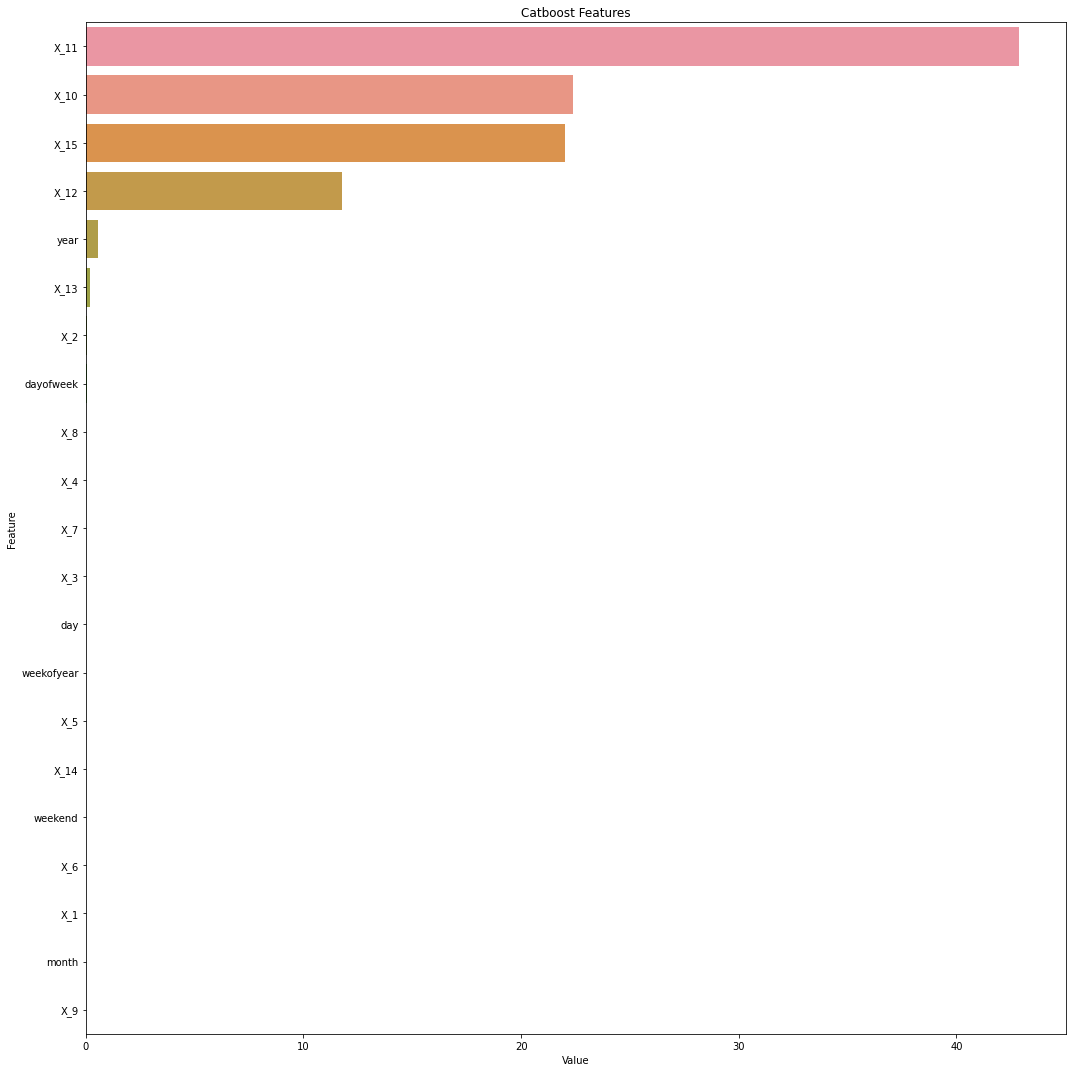

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test

In [ ]:
from sklearn.model_selection import KFold

errcat = []
y_pred_totcat = []

fold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    cat = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='Accuracy', 
                         depth=2,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1, 
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
    cat.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_cat = cat.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred_cat))

    errcat.append(accuracy_score(y_test,y_pred_cat))
    p = cat.predict(Xtest)
    y_pred_totcat.append(p)

Accuracy:  0.9983235540653814
Accuracy:  0.9979044425817267
Accuracy:  0.9974853310980721
Accuracy:  0.9983235540653814
Accuracy:  0.9995808885163453
Accuracy:  0.9970662196144174
Accuracy:  0.9987421383647799
Accuracy:  0.99958071278826
Accuracy:  0.9987421383647799
Accuracy:  0.9983228511530399


In [ ]:
np.mean(errcat,0)

0.9984071830612183

In [ ]:
cat_final = np.mean(y_pred_totcat,0).round().astype(int)
cat_final


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
cat_final=np.array(cat_final)

In [ ]:
df_sub = pd.DataFrame(data=cat_final, columns=['MULTIPLE_OFFENSE'])
df_sub.head()

,MULTIPLE_OFFENSE
0,1
1,1
2,1
3,1
4,1


In [ ]:
sub = pd.DataFrame(data={'INCIDENT_ID' :c, 'MULTIPLE_OFFENSE' : df_sub['MULTIPLE_OFFENSE']})

In [ ]:
sub.head(2)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,NaN,1.0
1,NaN,1.0


In [ ]:
sub['MULTIPLE_OFFENSE'].value_counts()

1.0    15190
0.0      713
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
test.to_csv('test.csv', index=False)

In [ ]:
from google.colab import files
files.download('test.csv')

# method 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as mpl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [ ]:
X = train.drop(columns=['MULTIPLE_OFFENSE'])
y = train.MULTIPLE_OFFENSE

In [ ]:
print('Percentage of each class in Target Variable \n')
print((train.MULTIPLE_OFFENSE.value_counts()/len(train))*100)

Percentage of each class in Target Variable 

1.0    95.523139
0.0     4.476861
Name: MULTIPLE_OFFENSE, dtype: float64


In [ ]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, max_features=0.7 , bootstrap=False)
cross_val_score(rfc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.9s finished


0.9984890945676973

In [ ]:
y = train.MULTIPLE_OFFENSE
corr = pd.concat(objs=[X, y], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(5)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,year,day,weekofyear,month,dayofweek,weekend,MULTIPLE_OFFENSE
X_1,1.00000,0.02200,0.02260,0.00214,-0.03422,0.40988,0.42145,-0.06190,0.01798,0.00416,-0.00308,-0.03460,0.11161,-0.01271,-0.01213,0.00798,-0.01035,0.01360,0.01475,-0.01446,-0.01761,0.01403
X_2,0.02200,1.00000,0.99699,-0.10432,-0.34919,0.11972,0.05881,-0.03817,-0.01775,-0.01671,0.03800,-0.06750,0.04667,0.01519,0.01382,-0.00611,0.00704,0.02015,0.01982,-0.01179,-0.01574,-0.02729
X_3,0.02260,0.99699,1.00000,-0.07534,-0.34752,0.12466,0.07295,-0.03304,-0.01985,-0.01449,0.03695,-0.06468,0.04320,0.01352,0.00685,-0.00038,0.00849,0.02051,0.02017,-0.01082,-0.01495,-0.02722
X_4,0.00214,-0.10432,-0.07534,1.00000,0.43962,0.02893,0.09408,0.07520,-0.00845,0.03808,-0.03761,0.05897,-0.05186,-0.03002,-0.03320,-0.01312,0.00368,-0.01317,-0.01407,0.02043,0.01602,-0.00292
X_5,-0.03422,-0.34919,-0.34752,0.43962,1.00000,-0.06278,0.01016,0.04693,0.04643,0.04621,-0.04311,0.08182,-0.07123,-0.00341,-0.03638,0.02181,-0.01009,-0.01424,-0.01429,0.01937,0.01720,-0.00345
X_6,0.40988,0.11972,0.12466,0.02893,-0.06278,1.00000,0.69524,-0.06354,0.07919,0.02119,-0.00299,-0.03113,0.04784,-0.01315,-0.00662,0.01337,-0.00055,0.01011,0.00762,-0.00445,-0.00599,-0.00790
X_7,0.42145,0.05881,0.07295,0.09408,0.01016,0.69524,1.00000,-0.01182,0.01152,0.02320,0.00297,-0.00041,0.01220,0.00374,-0.00328,0.04647,0.00172,0.01265,0.01025,0.00078,-0.00072,-0.00804
X_8,-0.06190,-0.03817,-0.03304,0.07520,0.04693,-0.06354,-0.01182,1.00000,-0.09018,0.22200,0.00942,0.27283,-0.04814,0.00399,0.01764,-0.04400,0.00540,-0.01521,-0.01452,0.02667,0.02765,-0.03340
X_9,0.01798,-0.01775,-0.01985,-0.00845,0.04643,0.07919,0.01152,-0.09018,1.00000,0.01339,-0.00615,0.00514,0.02354,-0.29730,0.00647,-0.02498,0.00262,0.00428,0.00283,0.00889,0.00897,-0.00075
X_10,0.00416,-0.01671,-0.01449,0.03808,0.04621,0.02119,0.02320,0.22200,0.01339,1.00000,-0.04560,0.87747,0.00233,-0.01652,-0.00334,-0.02644,0.00075,-0.00010,-0.00104,0.01110,0.01020,-0.24260


In [ ]:
X_test = test
concat = pd.concat(objs=[X, X_test], axis=0)

In [ ]:
#concat.drop(columns=['numerics','upper','punctuation_count'
#                     ], inplace=True)

ss = StandardScaler()
concat = ss.fit_transform(concat)

X, X_test = concat[:len(train), :], concat[len(train):, :]

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, max_features=0.9 , bootstrap=False)
cross_val_score(rfc, X, y, cv=45, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.0s finished


0.9987380267316424

In [ ]:
nnc = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=100,activation = 'logistic',solver='adam', 
                           random_state=42, batch_size=50)
cross_val_score(nnc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


0.9758987338976635

In [ ]:
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
cross_val_score(knc, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


0.9429293520735363

In [ ]:
lgbmc = LGBMClassifier(random_state=42, n_estimators=1000, colsample_bytree=1, 
                       max_depth=31, learning_rate=0.1, boosting_type='gbdt')
cross_val_score(lgbmc, X, y, cv=15, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   40.0s finished


0.9991164756740355

In [ ]:
xgbc = XGBClassifier(seed=7, n_jobs=-1, n_estimators=1000, random_state=42, max_depth=31, learning_rate=0.1)
cross_val_score(xgbc, X, y, cv=15, n_jobs=-1, verbose=1, scoring='f1_weighted').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.2min finished


0.9989502056974161

In [ ]:
xgbc.fit(X, y)
j = xgbc.predict(X_test)
sub = pd.DataFrame(data={'INCIDENT_ID' : c, 'MULTIPLE_OFFENSE' : j})

In [ ]:
sub.head(2)

,INCIDENT_ID,MULTIPLE_OFFENSE
23856,CR_195453,1.0
23857,CR_103520,1.0


In [ ]:
sub['MULTIPLE_OFFENSE'].value_counts()

1.0    15179
0.0      724
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
sub.to_csv('ag.csv', index=False)

In [ ]:
from google.colab import files
files.download('ag.csv')